# Data Preprocessing 

### Table of Contents 
* [Introduction](#introduction)
* [Exploratory Data Analysis](#eda) 
    * [Issues Identified](#issues)
* [Data Preprocessing](#data-prep)
    * [Handling Data Inconsistencies](#inc)
        * [Fixing Incosistent Categorical Entries](#a)
        * [Handling Inconsistent Entries for the Same Member](#b)
        * [Handling Multiple Entries for the Same Member per month](#c)
    * [Handling Outliers](#outliers)
    * [Handling Missing Values](#missing-val)
* [Feature Engineering](#feng)
* [Final Check](#check)
* [Conclusion](#conclusion)

In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction <a class="anchor" id="introduction"></a>
The dataset used in this study was sourced from 4 Global DataHub, the largest repository for sport and physical activity data in the UK. The dataset encompasses badminton participation records from various leisure centres across the UK for the financial year 2023-2024. Data was collected electronically by participating leisure centres, aggregated, and anonymized by 4 Global before being provided for this study.

In [5]:
# loading the dataset 
df = pd.read_csv("/Users/kuartina/Desktop/wetransfer_badmintonengland_rawdata_04jun24-csv_2024-06-04_1739/BE_Raw.csv")

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [7]:
df.head()

,county,year,month,member_id,age,gender,mosaic,deprivation,ethnicity,disability,programme,number_of_visits
0,Avon,2024,3,MEMBER1,34,M,U Unclassified,NaN,NaN,NaN,Casual,2
1,Avon,2024,3,MEMBER2,49,M,U Unclassified,NaN,NaN,NaN,Casual,1
2,Avon,2023,12,MEMBER3,26,F,U Unclassified,NaN,NaN,NaN,Casual,1
3,Avon,2023,12,MEMBER4,70,M,E Senior Security,5.0,NaN,NaN,Casual,1
4,Norfolk,2023,4,MEMBER5,45,U,D Rural Reality,4.0,NaN,NaN,Casual,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709014 entries, 0 to 709013
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   county            709014 non-null  object 
 1   year              709014 non-null  int64  
 2   month             709014 non-null  int64  
 3   member_id         709014 non-null  object 
 4   age               709014 non-null  int64  
 5   gender            709014 non-null  object 
 6   mosaic            709014 non-null  object 
 7   deprivation       445949 non-null  float64
 8   ethnicity         222033 non-null  object 
 9   disability        133405 non-null  object 
 10  programme         709014 non-null  object 
 11  number_of_visits  709014 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 64.9+ MB


##### The dataframe has 709,014 entries.

##### The deprivation, ethnicity, and disability columns have missing values (less than 709,014 non-null entries).

In [10]:
df.describe()

,year,month,age,deprivation,number_of_visits
count,709014.000000,709014.000000,709014.000000,445949.000000,709014.000000
mean,2023.273594,6.287178,35.361801,6.386035,2.351574
std,0.445803,3.409990,24.944717,2.799822,2.983357
min,2023.000000,1.000000,0.000000,1.000000,1.000000
25%,2023.000000,3.000000,23.000000,4.000000,1.000000
50%,2023.000000,6.000000,34.000000,7.000000,1.000000
75%,2024.000000,9.000000,49.000000,9.000000,3.000000
max,2024.000000,12.000000,2024.000000,10.000000,278.000000


 - **Year:** The data spans across the years 2023 to 2024.
  - **Month:** The month values range from 1 to 12.
  - **Age:** The age of members ranges from 0 to 2024, indicaing entry errors. 
  - **Deprivation:** The deprivation index ranges from 1 to 10, with some missing values.
  - **Number of Visits:** The number of visits ranges from 1 to 278, indicating some members have significantly more visits than others. As discussed with Badminton England, anything over 31 visits would be capped at 31.  

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(df)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage
disability,575609,81.184434
ethnicity,486981,68.684257
deprivation,263065,37.102934


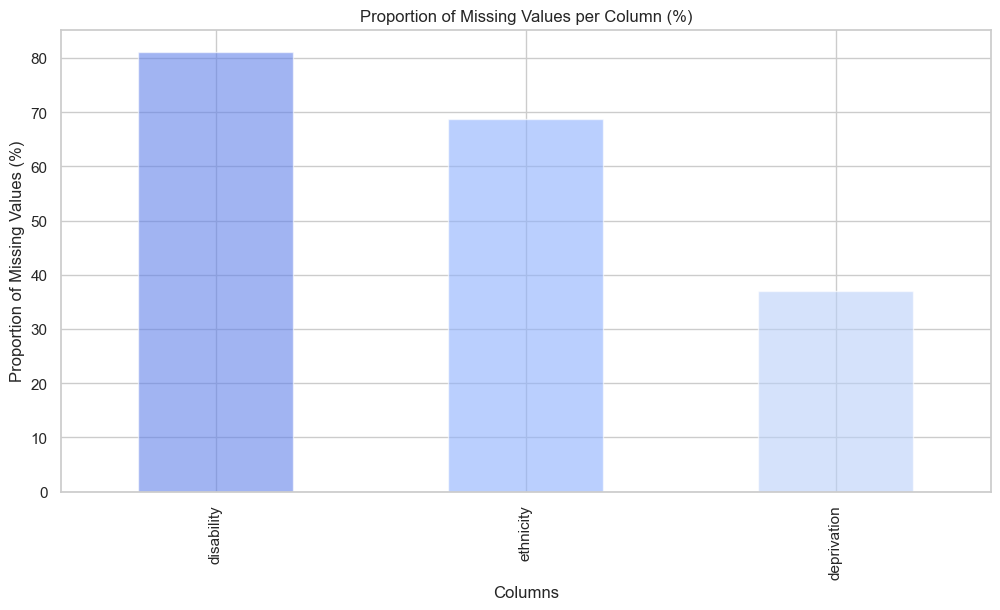

In [13]:
# Proportion of missing values
# setting the grid and palette
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette
sns.set(style="whitegrid")

# calculating the proportion of missing values
missing_prop = df.isnull().mean() * 100

# plotting the proportion of missing values
plt.figure(figsize=(12, 6))
missing_prop[missing_prop > 0].sort_values(ascending=False).plot(kind='bar', color=palette, alpha=0.6)
plt.title('Proportion of Missing Values per Column (%)')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values (%)')
plt.show()

In [14]:
# checking what data looks like per member_id
df[df.member_id=='MEMBER18481'].sort_values(by=['month'])

,county,year,month,member_id,age,gender,mosaic,deprivation,ethnicity,disability,programme,number_of_visits
516611,London Middlesex,2023,4,MEMBER18481,27,M,Postcode Not Provided,NaN,Indian,NaN,General,1
106799,London Middlesex,2023,5,MEMBER18481,28,M,O Rental Hubs,3.0,Indian,Not Collec,General,7
632426,London Middlesex,2023,5,MEMBER18481,27,M,O Rental Hubs,3.0,Not Given,Not Collec,General,12
177689,London Middlesex,2023,6,MEMBER18481,28,M,O Rental Hubs,3.0,Indian,Not Collec,General,2
704296,London Middlesex,2023,6,MEMBER18481,27,M,O Rental Hubs,3.0,Indian,Not Collec,General,50
562604,London Middlesex,2023,7,MEMBER18481,28,M,O Rental Hubs,3.0,Indian,Not Collec,General,9
681379,London Middlesex,2023,7,MEMBER18481,27,M,O Rental Hubs,3.0,Indian,Not Collec,General,14
20712,London Middlesex,2023,8,MEMBER18481,27,M,O Rental Hubs,3.0,Indian,Not Collec,General,3
354618,London Middlesex,2023,10,MEMBER18481,27,M,O Rental Hubs,3.0,Indian,Not Collec,General,1
476987,London Middlesex,2023,11,MEMBER18481,27,M,O Rental Hubs,3.0,Indian,Not Collec,General,1


##### Inconsistent Entries for the Same Member
There are instances where the same member has different values for certain features across multiple entries. For example, one member might have "Unknown," "Indian," and "Asian" recorded as ethnicities in different entries. This inconsistency complicates the analysis and interpretation of demographic data.

In [16]:
# displaying the unique values for each feature
unique_values = {column: df[column].unique() for column in df.columns}
for column, values in unique_values.items():
    print(f"\nUnique values for column {column}:")
    print(values)


Unique values for column county:
['Avon' 'Norfolk' 'Sussex' 'London Middlesex' 'Yorkshire' 'Suffolk'
 'Wiltshire' 'Buckinghamshire' 'Derbyshire' 'Staffordshire' 'UK WIDER'
 'London Surrey' 'Northumberland' 'Hampshire' 'Berkshire' 'Cheshire'
 'Lancashire' 'Surrey' 'Lincolnshire' 'Leicestershire' 'Hertfordshire'
 'Durham' 'Kent' 'Essex' 'Nottinghamshire' 'Worcestershire'
 'Cambridgeshire' 'Dorset' 'Devon' 'London Essex' 'Gloucestershire'
 'Herefordshire' 'Shropshire' 'Northamptonshire' 'Warwickshire'
 'Oxfordshire' 'Bedfordshire' 'Cumbria' 'London Kent' 'Somerset'
 'Cornwall']

Unique values for column year:
[2024 2023]

Unique values for column month:
[ 3 12  4  7  8 10 11  1  9  2  5  6]

Unique values for column member_id:
['MEMBER1' 'MEMBER2' 'MEMBER3' ... 'MEMBER271503' 'MEMBER271504'
 'MEMBER271505']

Unique values for column age:
[  34   49   26   70   45   29   27   44   25   35    0   74   28   30
   47   32   56   13   40   38   20   61   12   41   52   63   33   15
   37   54

### Issues Identified : <a class="anchor" id="issues"></a>

1. Data Inconsistencies :
   a) categorical entries under Programme, Ethnicity, Disability and Mosaic
   b) Inconsistent Entries for same members
   c) Multiple entries per month for the same Member
2. Outliers : Age and Number_of_visits
3. Missing values in the following columns : Disability, Deprivation and Ethnicity

In [18]:
# new_df for data preprocessing
new_df = df.copy()

## Data Preprocessing <a class="anchor" id="data-prep"></a>

### Handling Data Inconsistencies <a class="anchor" id="inc"></a>

#### a] Categorical Entries Under Programme, Disability, Ethnicity and Mosaic <a class="anchor" id="a"></a>

In [21]:
specific_columns = ['ethnicity', 'disability', 'mosaic', 'programme']

# printing the unique values for the specific columns
for column in specific_columns:
    if column in unique_values:
        print(f"\nUnique values for column {column}:")
        print(unique_values[column])
    else:
        print(f"\nColumn {column} not found in the DataFrame.")


Unique values for column ethnicity:
[nan 'White English, Welsh, Scottish, Northern Irish' 'Asian Other'
 'Other Ethnic Group' 'Prefer Not To Say'
 'Mixed/Multiple Ethnic Groups: White and Asian' 'Asian Indian'
 'White European Other' 'Unknown' 'White Other'
 'Mixed/Multiple Ethnic Groups: Other' 'Arab' 'Asian Chinese'
 'Asian Bangladeshi' 'Chinese' 'White Brit' 'Other Whit' 'White British'
 'Not Given' 'White' 'British' 'Black British' 'Mixed Ethnicity'
 'Unknown - Declined' 'Asian, Asian British or Asian Welsh' 'Unknown - '
 'White Irish' 'White Engl'
 'Black, Black British, Black Welsh, Caribbean or Af' 'Asian Chin'
 'Indian' 'Black Brit' 'Asian Pakistani' 'UNKNOWN' 'Other ethnic group'
 'Mixed or Multiple ethnic groups' 'Black British Black (Caribbean'
 'Other Ethnic Background' 'Black Caribbean' 'White &amp' 'Bangladesh'
 'Pakistani' 'Bangladeshi' 'Other White' 'Other Asian' 'Other Asia'
 'Irish' 'Eastern European' 'Not Collected' 'Other European'
 'Other Asian British Asian' 'Not

Ethnicity contains 122 unique values due to variations in the naming conventions. 

The disability data includes inconsistent entries. (some are binary some are detailed). 

"General" and "Casual" are used interchangeably in the Programme feature. 

Under Mosaic, There are entries labelled as "U Unclassified" and "Postcode not provided," both of which mean the same.

In [23]:
# defining the categories for programme
programme_mapping = {
    np.nan: 'Unknown',
    'Casual': 'Casual / General',
    'No Strings Badminton': 'No Strings Badminton',
    'General': 'Casual / General',
    'Organised': 'Organised',
    'Smash Up': 'Organised',
    'Club Badminton': 'Organised',
    'Other': 'Organised'
}

# applying the mapping to the disability column
new_df.loc[:, 'programme'] = new_df['programme'].map(programme_mapping).fillna('Unknown')

In [24]:
# checking what the changes look like
new_df['programme'].value_counts()

programme
Casual / General        632437
No Strings Badminton     41851
Organised                34726
Name: count, dtype: int64

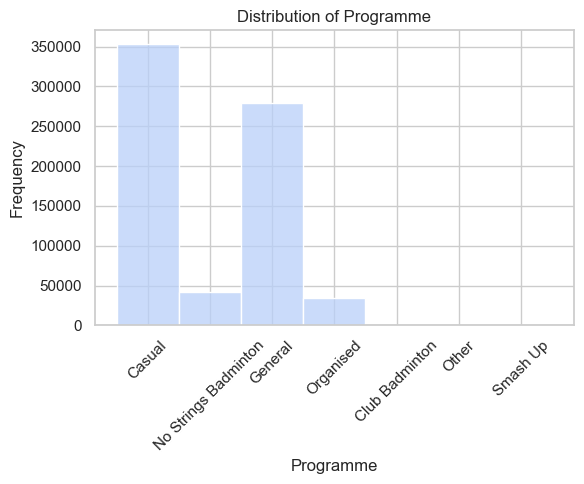

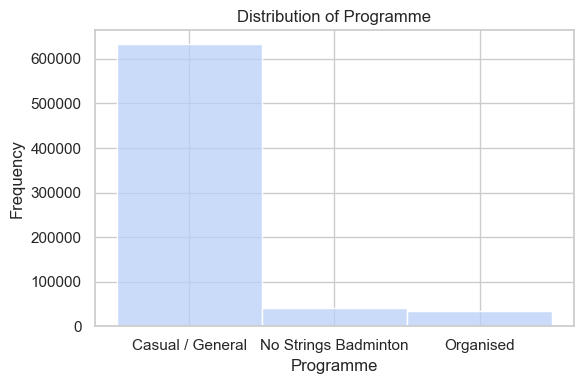

In [25]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# plotting for the first distribution
plt.figure(figsize=(6,5))
sns.histplot(df['programme'], bins=30, color=palette[2])
plt.title('Distribution of Programme')
plt.xlabel('Programme')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting for the second distribution
plt.figure(figsize=(6,4))
sns.histplot(new_df['programme'], bins=30, color=palette[2])
plt.title('Distribution of Programme')
plt.xlabel('Programme')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

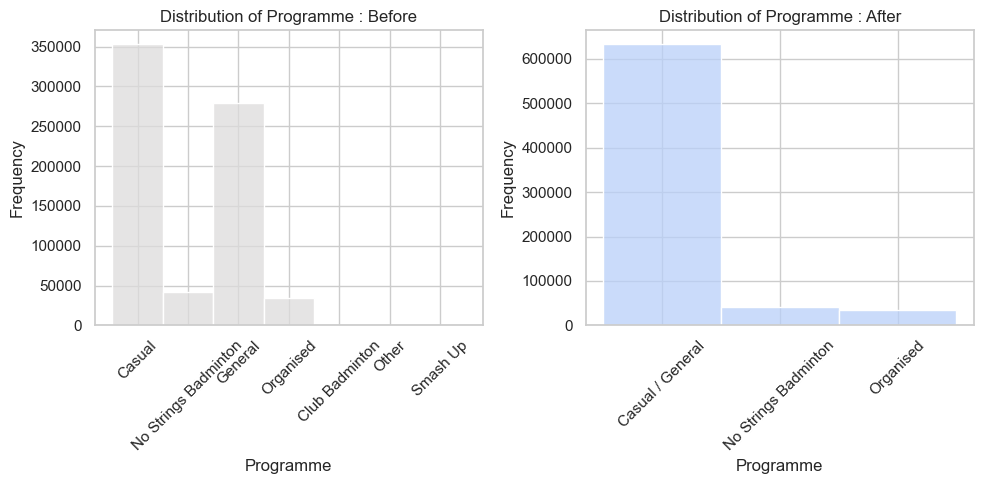

In [26]:
# Distribution of Programme
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plotting the programme distribution before
sns.histplot(df['programme'], bins=30, ax=ax[0], color=palette[3])
ax[0].set_title('Distribution of Programme : Before')
ax[0].set_xlabel('Programme')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)  # Make x-axis labels slanting

# plotting the programme distribution after
sns.histplot(new_df['programme'], bins=30, ax=ax[1], color=palette[2])
ax[1].set_title('Distribution of Programme : After')
ax[1].set_xlabel('Programme')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)  # Make x-axis labels slanting

plt.tight_layout()
plt.show()

In [27]:
# defining the categories for disability
disability_mapping = {
    np.nan: 'Unknown',
    'No Disabil': 'No',
    'No': 'No',
    'Yes': 'Yes',
    'Not Collec': 'Unknown',
    'Unknown': 'Unknown',
    'Health / O': 'Yes',
    'Learning D': 'Yes',
    'Physical I': 'Yes',
    'Learning d': 'Yes',
    'Hearing Im': 'Yes',
    'Multiple I': 'Yes',
    'Visual Imp': 'Yes'
}

# applying the mapping to the disability column
new_df.loc[:, 'disability'] = new_df['disability'].map(disability_mapping).fillna('Unknown')

In [28]:
# checking what the changes look like
new_df['disability'].value_counts()

disability
Unknown    584468
No         122420
Yes          2126
Name: count, dtype: int64

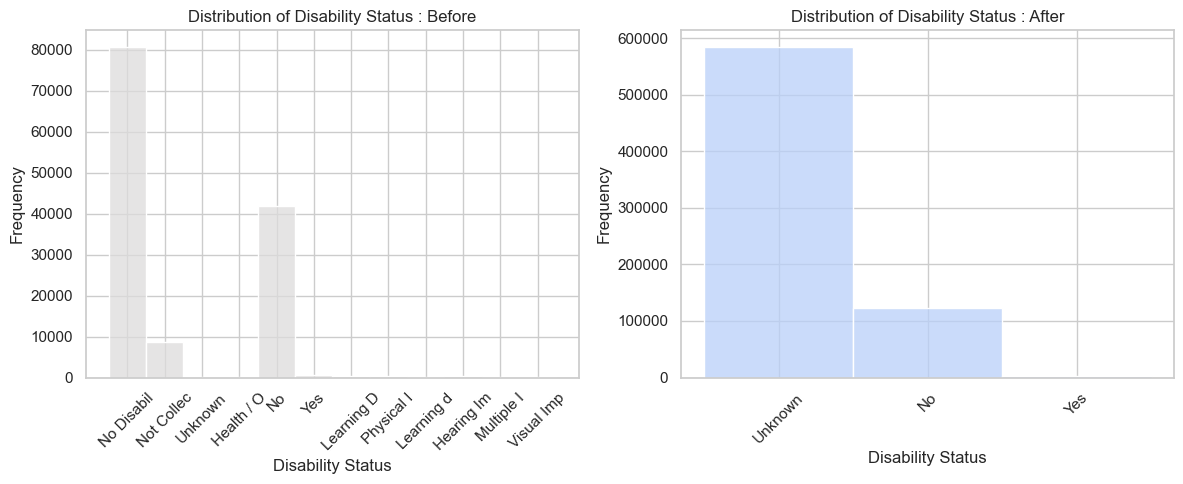

In [29]:
# Distribution of Disability Status
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plotting disability status distributio before
sns.histplot(df['disability'], bins=30, ax=ax[0], color=palette[3])
ax[0].set_title('Distribution of Disability Status : Before')
ax[0].set_xlabel('Disability Status')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)  # Make x-axis labels slanting

# ploting disability status distribution after
sns.histplot(new_df['disability'], bins=30, ax=ax[1], color=palette[2])
ax[1].set_title('Distribution of Disability Status : After')
ax[1].set_xlabel('Disability Status')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)  # Make x-axis labels slanting

plt.tight_layout()
plt.show()

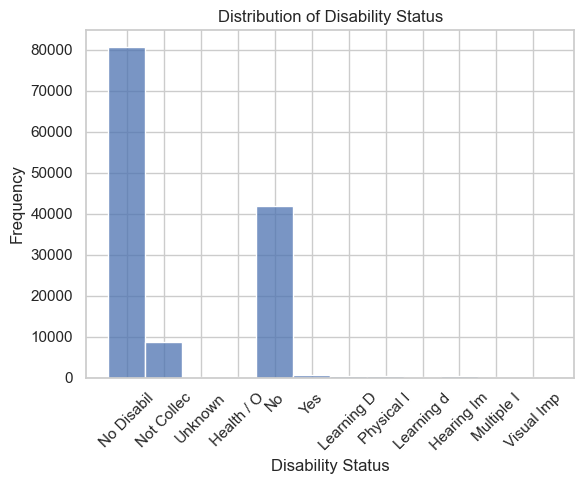

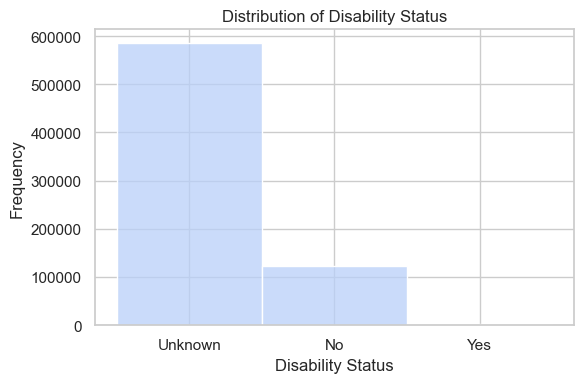

In [30]:
# Distribution of Disability Status
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# Plot for the first distribution
plt.figure(figsize=(6,5))
sns.histplot(df['disability'], bins=30)
plt.title('Distribution of Disability Status')
plt.xlabel('Disability Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for the second distribution
plt.figure(figsize=(6,4))
sns.histplot(new_df['disability'], bins=30, color=palette[2])
plt.title('Distribution of Disability Status')
plt.xlabel('Disability Status')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [31]:
# defining the mapping for ethnicity simplification 
white = [
    'White English, Welsh, Scottish, Northern Irish', 'White European Other', 'White Other', 'White Brit',
    'Other Whit', 'White British', 'White', 'British', 'White Irish', 'White Engl','White &amp', 'Other White',
    'Irish', 'Eastern European','Other European', 'White And ', 'Other Euro', 'Eastern Eu', 'White Othe', 'White Euro', 
    'Eastern European (New EU)', 'White Gypsy or Irish Traveller', 'White and ', 'White -  E', 'other whit',
    'White &amp;amp; Asian','Any Other White Background', 'White -  Eng/We/Scot/NI/B', 'other white', 'White Iris', 
    'OTHER EUROPEAN', 'OTHER EURO', 'other white' 
]

mixed = [
    'Mixed/Multiple Ethnic Groups: White and Asian', 'Mixed/Multiple Ethnic Groups: Other', 'Mixed Ethnicity', 
    'Mixed or Multiple ethnic groups', 'Other Mixed Ethnic Background', 'Mixed/Multiple Ethnic Groups:White/Black Caribbean',
    'White and Black Caribbean',  'White And Asian', 'White and Asian', 'White & Asian','Mixed Ethn','Other Mixe', 
    'White And Black Caribbean', 'Mixed/Multiple Ethnic Groups: White/Black African',  'White And Black African', 
    'Other Mixed Background', 'White and Black African', 'Mixed/Mult', 'Mixed - Wh', 'Any Other Mixed Background'
]

asian = [
    'Asian Other', 'Asian Indian', 'Asian Chinese', 'Asian Bangladeshi', 'Asian, Asian British or Asian Welsh', 
    'Chinese', 'Asian Chin','Indian', 'Asian Pakistani','Bangladesh', 'Pakistani','Bangladeshi', 'Other Asian','Other Asia',
    'Other Asian British Asian', 'Other Asian / British Asian', 'Asian - In', 'Asian Indi', 'other asia', 'Asian Othe', 'Asian Or A',
    'Asian Or Asian British Indian', 'Asian Bang', 'Asian Paki',  'Asian - Indian','Any Other Asian Background','other asian'
]

black = [
    'Black British', 'Black, Black British, Black Welsh, Caribbean or Af','Black Brit','Black British Black (Caribbean',
    'Black Caribbean', 'Black Cari','Black African', 'Black/British Black(African)', 'Black Other', 'Black British Black (African)',
    'Black Somali', 'Black Afri','Black Or Black British Caribbean','Black/British Black(Caribbean)','Black/Brit', 'Black Othe',
    'Black - Other', 'Other Black / Black British', 'Other Blac','Black Or Black British African', 'Black British Black (Caribbean',
    'Black'
]

other = [
    'Other Ethnic Group', 'Arab', 'Other ethnic group','Other Ethnic Background', 'Antipodean', 'Turkish', 'Other Ethn', 'Jewish',
    'Any Other ', 'Other'
]

# creating a dictionary for the mapping
ethnicity_mapping = {eth: 'White' for eth in white}
ethnicity_mapping.update({eth: 'Mixed' for eth in mixed})
ethnicity_mapping.update({eth: 'Asian' for eth in asian})
ethnicity_mapping.update({eth: 'Black' for eth in black})
ethnicity_mapping.update({eth: 'Other' for eth in other})

# applying the function to the dataframe
new_df.loc[:, 'ethnicity'] = new_df['ethnicity'].map(ethnicity_mapping).fillna('Unknown')

In [32]:
# checking what the changes look like
new_df['ethnicity'].value_counts()

ethnicity
Unknown    546001
White       74089
Asian       68825
Other       11775
Black        4718
Mixed        3606
Name: count, dtype: int64

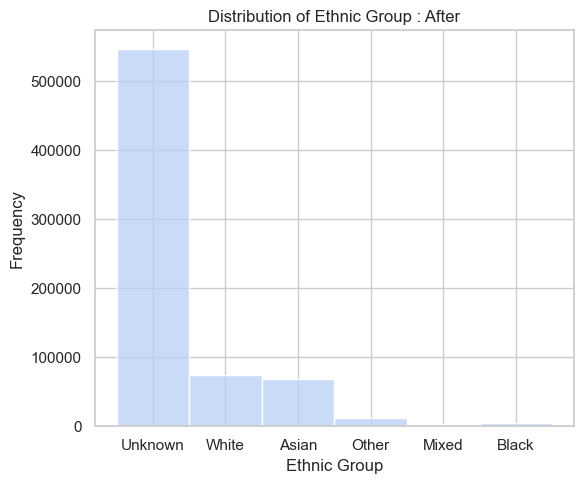

In [33]:
# Distribution of Ethnic Groups
plt.figure(figsize=(6, 5))
sns.histplot(new_df['ethnicity'], bins=30, color=palette[2])
plt.title('Distribution of Ethnic Group : After')
plt.xlabel('Ethnic Group')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

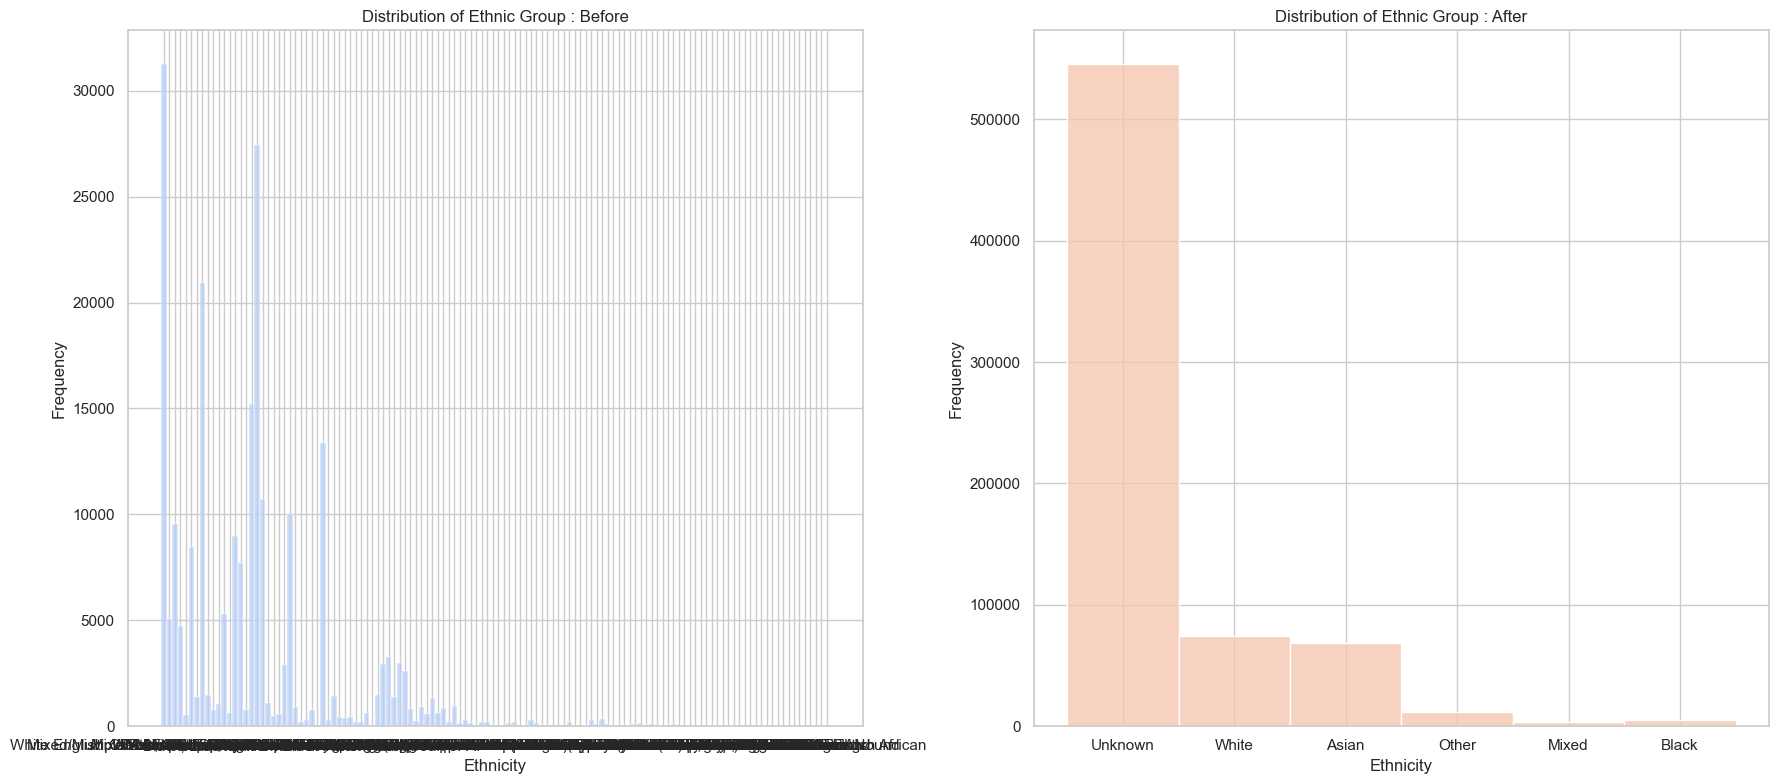

In [34]:
# Distribution of Ethnic Groups
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# plotting age distribution
sns.histplot(df['ethnicity'], bins=30, ax=ax[0], color = palette[2])
ax[0].set_title('Distribution of Ethnic Group : Before')
ax[0].set_xlabel('Ethnicity')
ax[0].set_ylabel('Frequency')

# plotting distribution
sns.histplot(new_df['ethnicity'], bins=30, ax=ax[1], color = palette[4])
ax[1].set_title('Distribution of Ethnic Group : After')
ax[1].set_xlabel('Ethnicity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [35]:
# replacing 'Postcode Not Provided' and 'U Unclassified' with 'Unknown' in the 'mosaic' column
new_df['mosaic'] = new_df['mosaic'].replace(['Postcode Not Provided', 'U Unclassified'], 'Unknown')

In [36]:
# checking the changes made 
new_df['mosaic'].value_counts()

mosaic
Unknown                  208626
G Domestic Success        78937
B Prestige Positions      64614
H Aspiring Homemakers     63992
O Rental Hubs             52941
E Senior Security         33290
N Urban Cohesion          32721
A City Prosperity         28854
F Suburban Stability      28174
I Family Basics           23859
C Country Living          22497
J Transient Renters       17687
D Rural Reality           16964
K Municipal Tenants       15023
M Modest Traditions       12593
L Vintage Value            8242
Name: count, dtype: int64

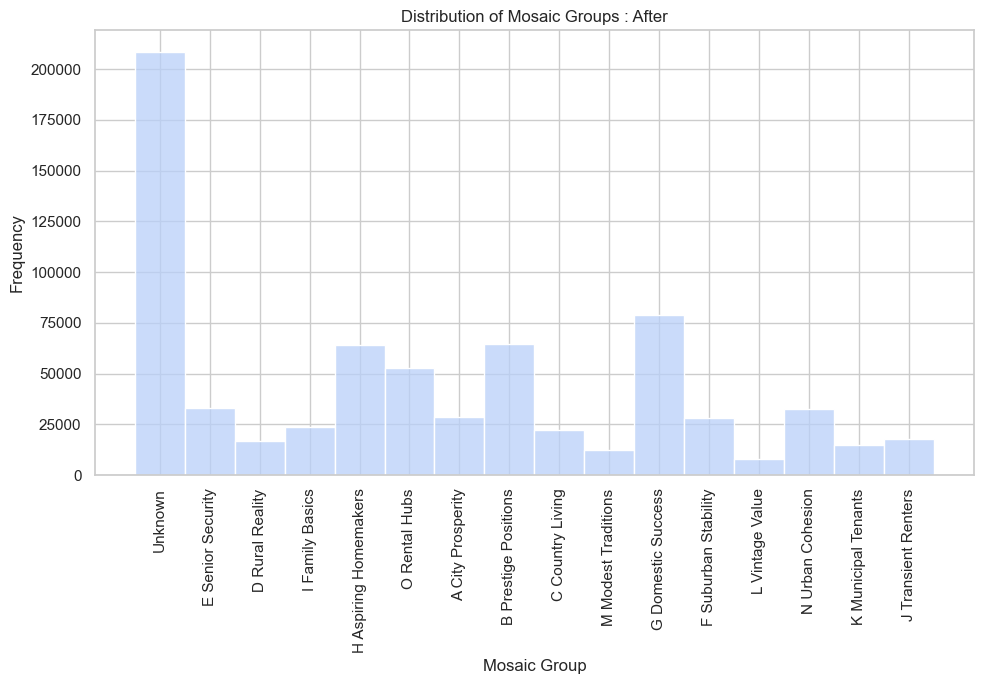

In [37]:
# Distribution of Mosaic Groups
# plotting mosaic disrribution
plt.figure(figsize=(10,7))
sns.histplot(new_df['mosaic'], bins=30, color=palette[2])
plt.title('Distribution of Mosaic Groups : After')
plt.xlabel('Mosaic Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### b] Handling Inconsistent Entries for the Same Member <a class="anchor" id="b"></a>

In [39]:
new_df[new_df.member_id=='MEMBER18481'].sort_values(by=['month'])

,county,year,month,member_id,age,gender,mosaic,deprivation,ethnicity,disability,programme,number_of_visits
516611,London Middlesex,2023,4,MEMBER18481,27,M,Unknown,NaN,Asian,Unknown,Casual / General,1
106799,London Middlesex,2023,5,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,7
632426,London Middlesex,2023,5,MEMBER18481,27,M,O Rental Hubs,3.0,Unknown,Unknown,Casual / General,12
177689,London Middlesex,2023,6,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,2
704296,London Middlesex,2023,6,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,50
562604,London Middlesex,2023,7,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,9
681379,London Middlesex,2023,7,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,14
20712,London Middlesex,2023,8,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,3
354618,London Middlesex,2023,10,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,1
476987,London Middlesex,2023,11,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,1


There are instances where the same member has different values for certain features across multiple entries. For example, one member might have "Unknown," "Indian," and "Asian" recorded as ethnicities in different entries. This inconsistency complicates the analysis and interpretation of demographic data.

In [41]:
# defining function to replace 'U' with the first non-unknown value in the gender column
def replace_u(series):
    non_us = series[~series.isin(['U']) & series.notnull()]
    if not non_us.empty:
        return non_us.iloc[0]
    else:
        return series.iloc[0]

# Apply the custom aggregation function to the 'ethnicity' column
new_df['gender'] = new_df.groupby('member_id')['gender'].transform(replace_u)

In [42]:
new_df['gender'].value_counts()

gender
M    372678
F    228137
U    108199
Name: count, dtype: int64

In [43]:
# defining function to replace 'Unknown' with the first non-unknown value in Ethnicity, Mosaic and Disability Column
def replace_unknowns(series):
    non_unknowns = series[~series.isin(['Unknown']) & series.notnull()]
    if not non_unknowns.empty:
        return non_unknowns.mode()[0]
    else:
        return 'Unknown'

# Apply the custom aggregation function to the 'ethnicity', 'mosaic', and 'disability' columns
new_df['ethnicity'] = new_df.groupby('member_id')['ethnicity'].transform(replace_unknowns)
new_df['mosaic'] = new_df.groupby('member_id')['mosaic'].transform(replace_unknowns)
new_df['disability'] = new_df.groupby('member_id')['disability'].transform(replace_unknowns)

In [44]:
# checking changes made 
new_df['ethnicity'].value_counts()

ethnicity
Unknown    543165
White       75315
Asian       69800
Other       12121
Black        4819
Mixed        3794
Name: count, dtype: int64

In [45]:
# checking changes made 
new_df['mosaic'].value_counts()

mosaic
Unknown                  195984
G Domestic Success        80686
B Prestige Positions      66519
H Aspiring Homemakers     65225
O Rental Hubs             54643
E Senior Security         34472
N Urban Cohesion          33351
A City Prosperity         29676
F Suburban Stability      28781
I Family Basics           24357
C Country Living          22963
J Transient Renters       18137
D Rural Reality           17357
K Municipal Tenants       15478
M Modest Traditions       12895
L Vintage Value            8490
Name: count, dtype: int64

In [46]:
# checking changes made 
new_df['disability'].value_counts()

disability
Unknown    566185
No         140633
Yes          2196
Name: count, dtype: int64

#### c] Handling Multiple Entries for the Same Member for the Same Month <a class="anchor" id="c"></a>

In [48]:
new_df[new_df.member_id=='MEMBER18481'].sort_values(by=['month'])

,county,year,month,member_id,age,gender,mosaic,deprivation,ethnicity,disability,programme,number_of_visits
516611,London Middlesex,2023,4,MEMBER18481,27,M,O Rental Hubs,NaN,Asian,Unknown,Casual / General,1
106799,London Middlesex,2023,5,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,7
632426,London Middlesex,2023,5,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,12
177689,London Middlesex,2023,6,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,2
704296,London Middlesex,2023,6,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,50
562604,London Middlesex,2023,7,MEMBER18481,28,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,9
681379,London Middlesex,2023,7,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,14
20712,London Middlesex,2023,8,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,3
354618,London Middlesex,2023,10,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,1
476987,London Middlesex,2023,11,MEMBER18481,27,M,O Rental Hubs,3.0,Asian,Unknown,Casual / General,1


The Data has been collected from different leisure centres for the same Member and so there are multiple entries for the same month per member_id. To fix this, I will aggregate the number_of_visits and retain one entry per month. 

In [50]:
# aggregating the number of visits within the same month to ensure only one entry per member per month
new_df = new_df.groupby(['member_id', 'year', 'month']).agg({
    'county' : 'first',
    'age': 'first',
    'gender': 'first',
    'mosaic': 'first',
    'deprivation': 'first',
    'ethnicity': 'first',
    'disability': 'first',
    'programme': 'first',
    'number_of_visits': 'sum'
}).reset_index()

### Handling Outliers <a class="anchor" id="outliers"></a>

Both Age and Number_of_visits consist Outliers. 

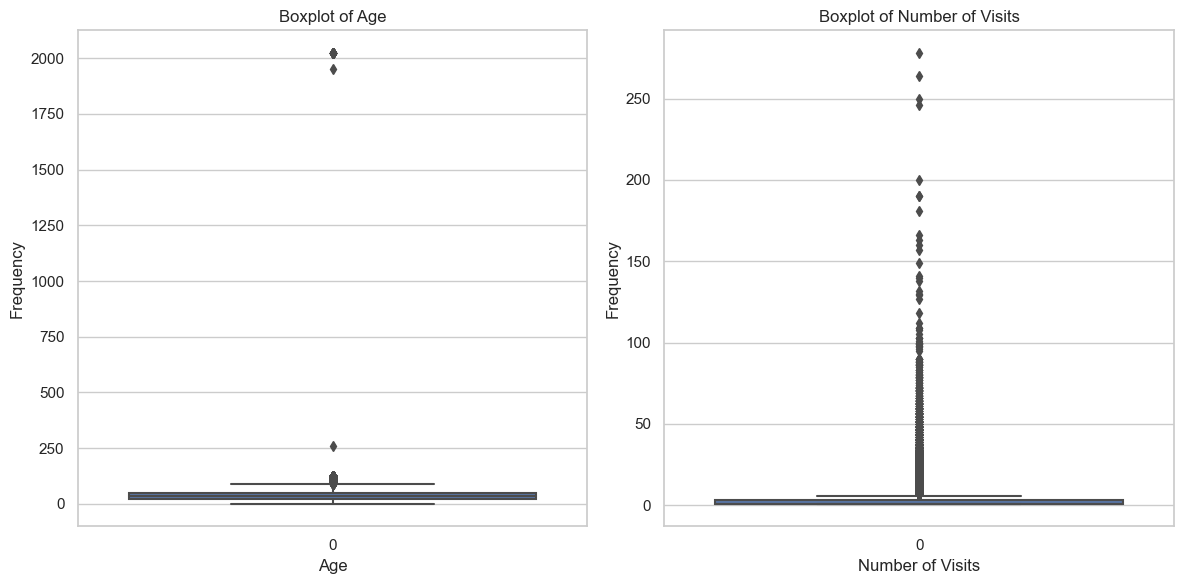

In [52]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot age distribution
sns.boxplot(new_df['age'], ax=ax[0])
ax[0].set_title('Boxplot of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# plot number of visits distribution
sns.boxplot(new_df['number_of_visits'], ax=ax[1])
ax[1].set_title('Boxplot of Number of Visits')
ax[1].set_xlabel('Number of Visits')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

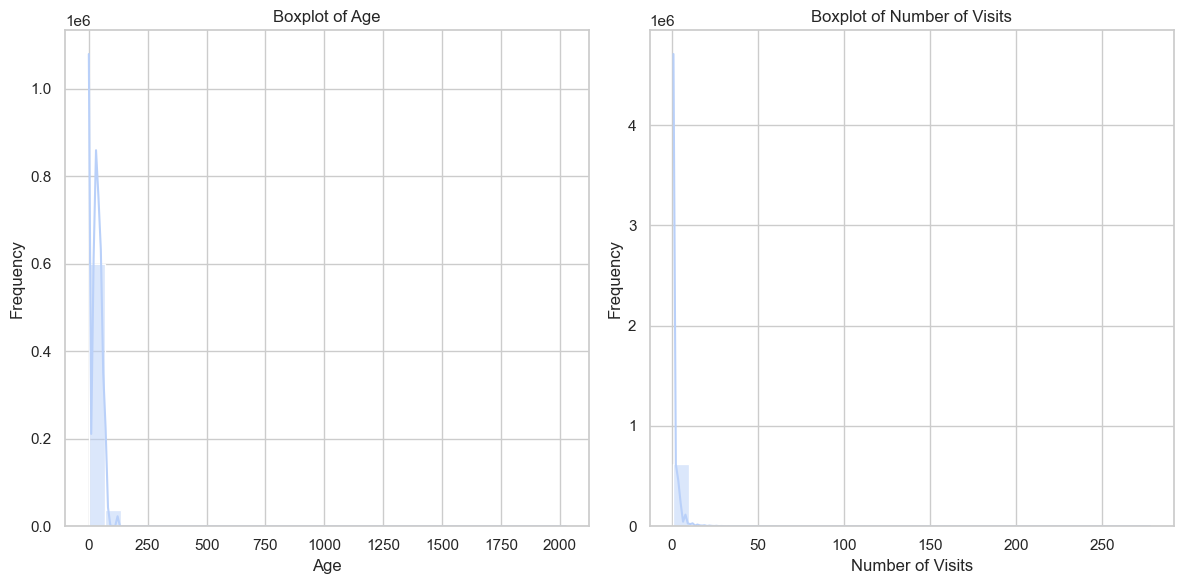

In [53]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot age distribution
sns.histplot(new_df['age'], bins = 30, kde=True,  ax=ax[0], color=palette[2])
ax[0].set_title('Boxplot of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# plot number of visits distribution
sns.histplot(new_df['number_of_visits'], bins = 30, kde = True, ax=ax[1], color=palette[2])
ax[1].set_title('Boxplot of Number of Visits')
ax[1].set_xlabel('Number of Visits')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

As agreed with Badminton England, Members with ages less than 5 and more than 95 will be dropped as they're considered to be outliers. 
Number_of_visits will be capped at 30 (1 per day) as it reflect monthly visit frequency. 

In [55]:
# removing entries with ages less than 5 and more than 90
new_df = new_df[(new_df['age'] <= 95) & (new_df['age'] >= 5)]

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565247 entries, 0 to 637170
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   member_id         565247 non-null  object 
 1   year              565247 non-null  int64  
 2   month             565247 non-null  int64  
 3   county            565247 non-null  object 
 4   age               565247 non-null  int64  
 5   gender            565247 non-null  object 
 6   mosaic            565247 non-null  object 
 7   deprivation       394491 non-null  float64
 8   ethnicity         565247 non-null  object 
 9   disability        565247 non-null  object 
 10  programme         565247 non-null  object 
 11  number_of_visits  565247 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 56.1+ MB


In [57]:
# capping the 'number_of_visits' at 31
new_df['number_of_visits'] = new_df['number_of_visits'].clip(upper=31)

In [58]:
# getting the value counts of 'number_of_visits' greater than 30
value_counts_over_30 = new_df['number_of_visits'][new_df['number_of_visits'] > 29].value_counts()

print(value_counts_over_30)

number_of_visits
31    1297
30     179
Name: count, dtype: int64


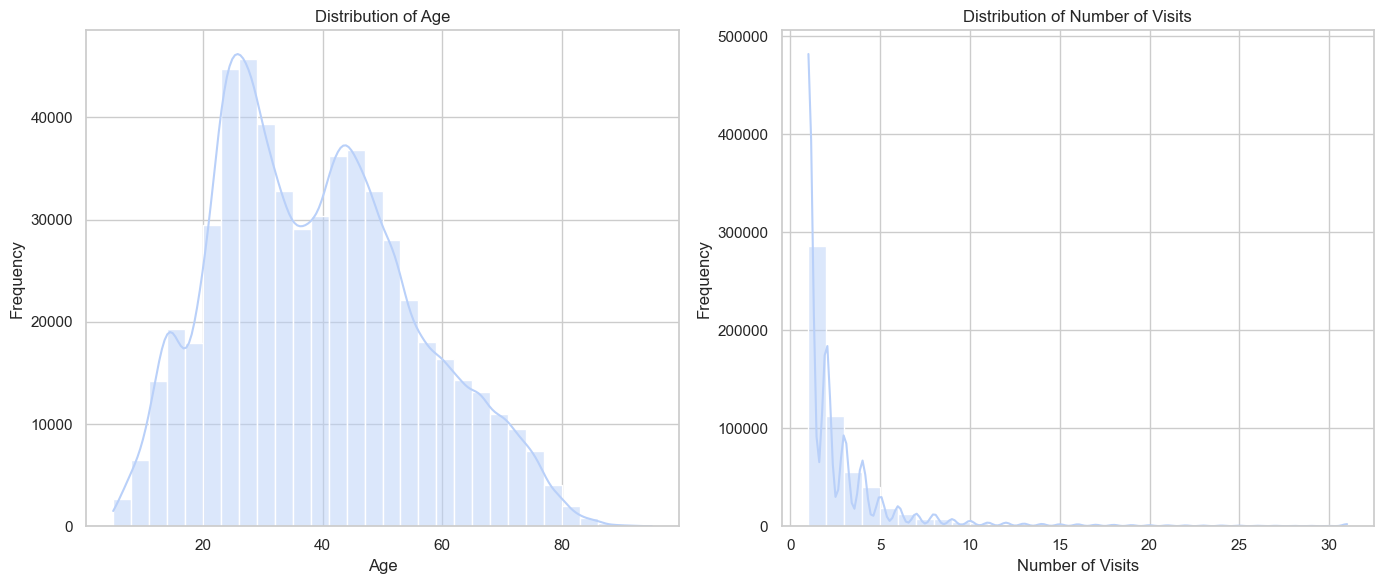

In [59]:
# Set the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plotting age distribution
sns.histplot(new_df['age'], bins=30, kde=True, ax=ax[0], color = palette[2])
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# plotting number of visits distribution
sns.histplot(new_df['number_of_visits'], bins=30, kde=True, ax=ax[1], color = palette[2])
ax[1].set_title('Distribution of Number of Visits')
ax[1].set_xlabel('Number of Visits')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Handling Missing Values (Deprivation) <a class="anchor" id="missing-val"></a>

In [61]:
# checking % of missing values 
missing_values = new_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(new_df)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage
deprivation,170756,30.209094


In [62]:
# imputing missing deprivation values based on the rounded mean deprivation value for each county
new_df['deprivation'] = new_df.groupby('county')['deprivation'].transform(lambda x: x.fillna(round(x.mean())))

In [63]:
# final check oif missing values 
missing_values = new_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(new_df)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage


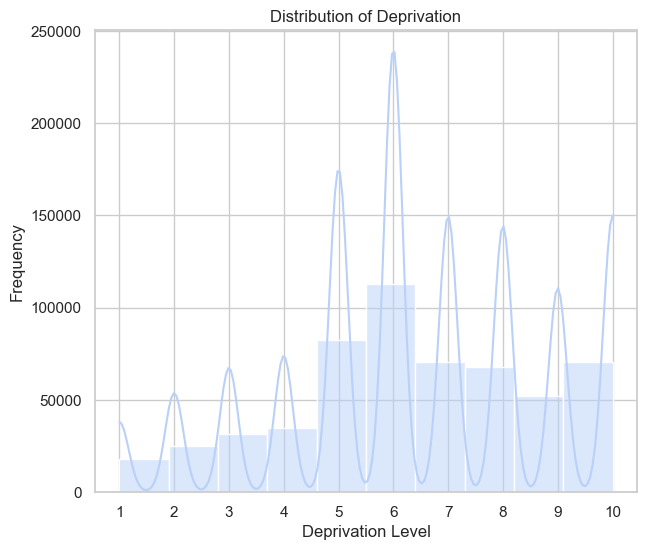

In [64]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# plotting the distribution of the 'deprivation'
plt.figure(figsize=(7, 6))
sns.histplot(new_df['deprivation'], bins=10, kde=True, color=palette[2])
plt.title('Distribution of Deprivation')
plt.xlabel('Deprivation Level')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))  # ensuring the x-axis has all deprivation levels from 1 to 10
plt.show()

By implementing these data cleaning steps, the dataset was refined to ensure accuracy, consistency, and relevance, providing a solid foundation for subsequent analyses and insights.

### Feature Engineering <a class="anchor" id="feng"></a>

For a clearer representation, ages were categorised into bins reflecting operational focus and relevant life stages:
Children: Ages 5-12, aligned with "The Racket Pack."

Teenagers: Ages 13-19, aligned with "Junior Membership."

Young Adults: Ages 19-35.

Middle Aged: Ages 36-64.

Seniors: Ages 65-94. 

In [68]:
# defining function to categorize ages
def categorize_age(age):
    if 5 <= age <= 12:
        return 'Children (5-12)'
    elif 13 <= age <= 19:
        return 'Teenagers (13-19)'
    elif 20 <= age <= 39:
        return 'Young Adults (20-39)'
    elif 40 <= age <= 64:
        return 'Middle-aged Adults (40-64)'
    elif 65 <= age <= 95:
        return 'Seniors (65-95)'
    else:
        return 'Unknown'

# applying the function to create a new column
new_df['age_category'] = new_df['age'].apply(categorize_age)

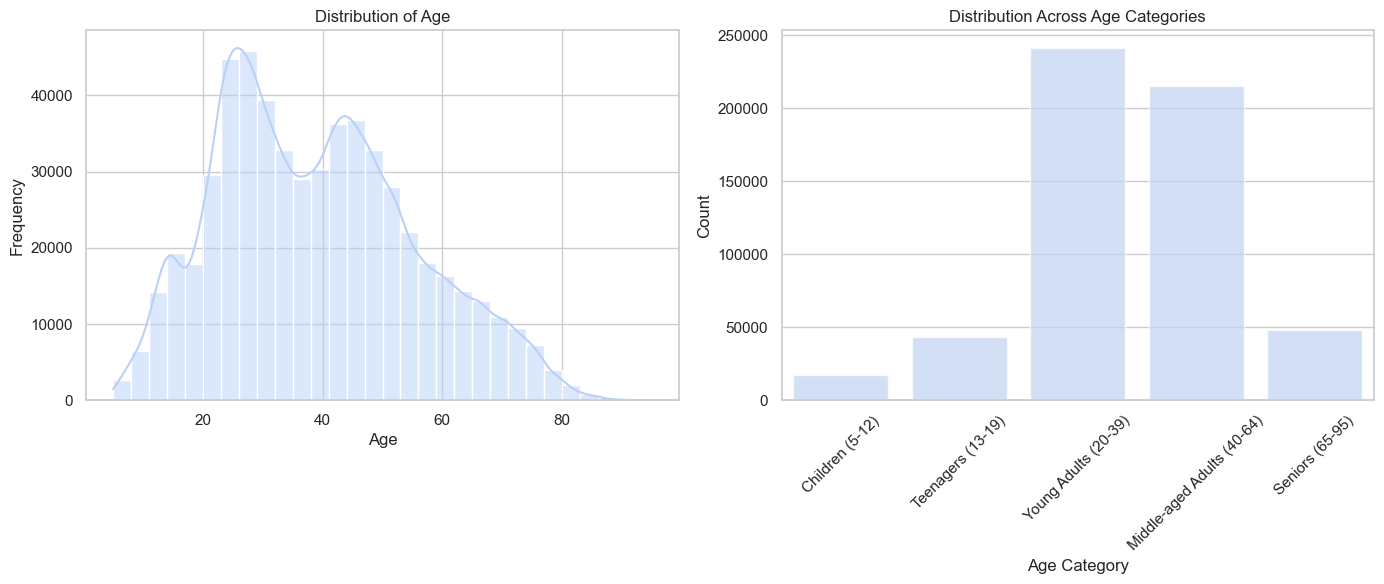

In [69]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# Analyze demographic distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for age distribution
sns.histplot(new_df['age'], bins=30, kde=True, ax=ax[0], color=palette[2])
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Age category distribution
sns.countplot(x='age_category', data=new_df, ax=ax[1], color=palette[2], alpha=0.7, order=['Children (5-12)', 'Teenagers (13-19)', 'Young Adults (20-39)', 'Middle-aged Adults (40-64)', 'Seniors (65-95)'])
ax[1].set_title('Distribution Across Age Categories')
ax[1].set_xlabel('Age Category')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

This binning approach aligns with the membership structure and supports targeted analysis by grouping ages into clearly defined segments that correspond with life stages, enhancing the relevance and applicability of the data for planning and evaluation.

To capture seasonal variations, a new feature called "season" was created. This feature categorises months into four seasons: Winter (December, January, February), Spring (March, April, May), Summer (June, July, August), and Autumn (September, October, November).

In [71]:
# defining function to categorize months into UK seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# applying the function to create a new column
new_df['season'] = new_df['month'].apply(categorize_season)

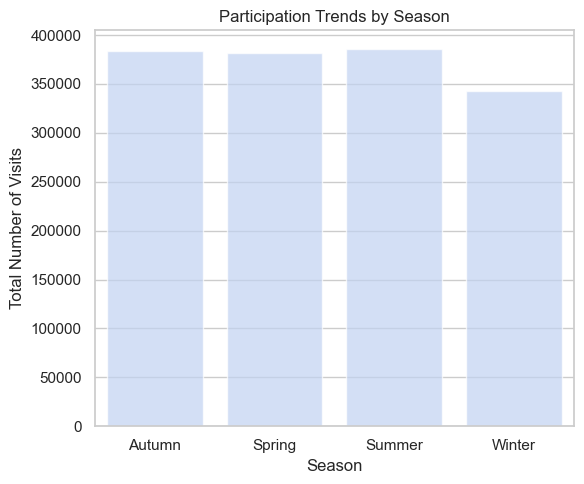

In [72]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# aggregating data by season and count the number of visits
seasonal_participation = new_df.groupby('season').agg({'number_of_visits': 'sum'}).reset_index()

# plotting a bar plot for seasonal trends in participation
plt.figure(figsize=(6, 5))
sns.barplot(data=seasonal_participation, x='season', y='number_of_visits', color = palette[2], alpha = 0.7)
plt.title('Participation Trends by Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Visits')
plt.tight_layout()
plt.show()

A new feature called Region was created. This feature simplifies geographical analysis and allows for the identification of regional trends and differences in participation.

In [74]:
# defining function to categorize counties into region
def assign_region(county):
    north = ['Cheshire', 'Lancashire', 'Cumbria', 'Yorkshire', 'Durham', 'Northumberland']
    south = ['Oxfordshire', 'Berkshire', 'Buckinghamshire', 'Hampshire','Sussex', 'Surrey', 
         'Essex', 'Kent', 'London Middlesex', 'London Surrey', 'London Essex', 'London Kent']
    east = ['Nottinghamshire','Northamptonshire', 'Leicestershire', 'Lincolnshire', 'Derbyshire', 
            'Suffolk','Norfolk', 'Bedfordshire','Cambridgeshire', 'Hertfordshire']
    west = ['Herefordshire', 'Staffordshire', 'Shropshire', 'Warwickshire', 'Worcestershire',
        'Cornwall','Devon','Dorset', 'Wiltshire','Somerset', 'Avon','Gloucestershire',]


    if county in north:
        return 'North'
    elif county in south:
        return 'South'
    elif county in east:
        return 'East'
    elif county in west:
        return 'West'
    elif county == 'UK WIDER':
        return 'UK Wider'
    else:
        return 'Unknown' 

# applying the function to the DataFrame
new_df['region'] = new_df['county'].apply(assign_region)

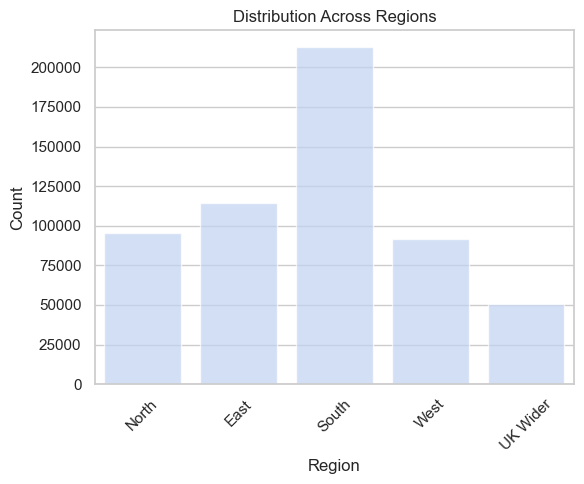

In [75]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

#plotting count of region
plt.figure(figsize=(6, 5))
sns.countplot(x='region', data=new_df, color=palette[2], alpha=0.7, order=['North', 'East', 'South', 'West', 'UK Wider'])
plt.title('Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [76]:
# creating a 'date' feature from year and month
new_df['date'] = pd.to_datetime(new_df['year'].astype(str) + '-' + new_df['month'].astype(str) + '-01')

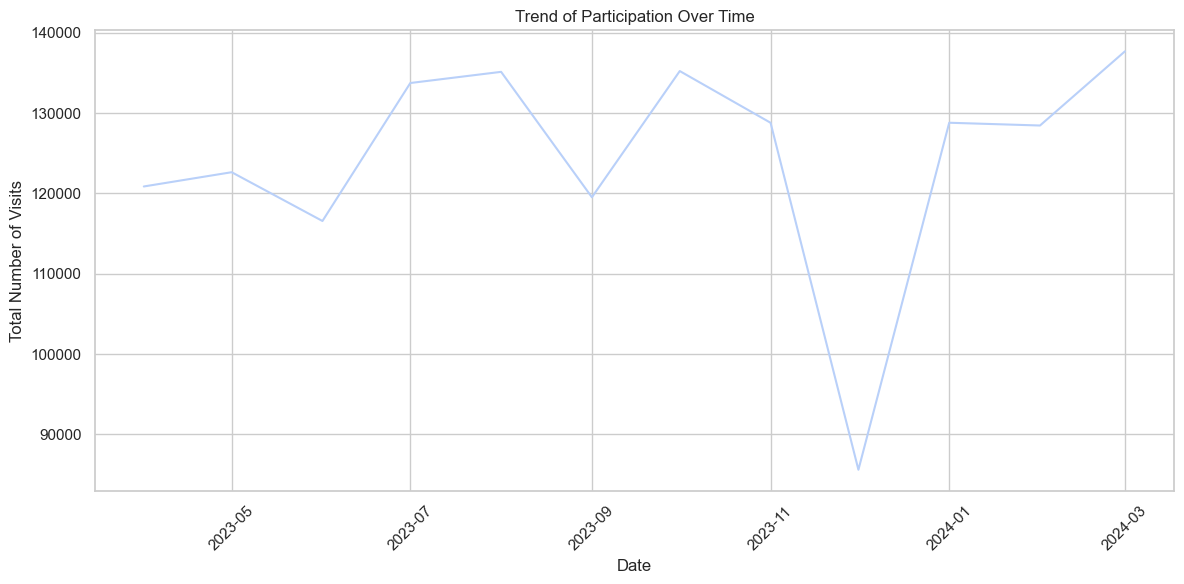

In [106]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# converingt 'date' to datetime format for easier manipulation
new_df['date'] = pd.to_datetime(new_df['date'])

# aggregating data by date to see overall trends in participation over time
participation_trend = new_df.groupby('date').agg({'number_of_visits': 'sum'}).reset_index()

# creating a line plot for temporal trends in participation
plt.figure(figsize=(12, 6))
sns.lineplot(data=participation_trend, x='date', y='number_of_visits', color=palette[2])
plt.title('Trend of Participation Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
# defining function to categorize deprivation
def categorize_deprivation(value):
    if pd.isna(value):
        return 'Unknown'  # Handling possible NaN values
    elif value <= 3:
        return 'High'
    elif value <= 7:
        return 'Medium'
    elif value <= 10:
        return 'Low'

# applying function to create new categorical column
new_df['deprivation_category'] = new_df['deprivation'].apply(categorize_deprivation)

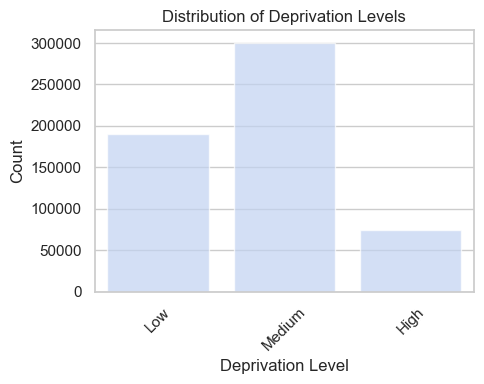

In [136]:
# setting the grid and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# creating the plot
plt.figure(figsize=(5, 4))
sns.countplot(x='deprivation_category', data=new_df, color=palette[2], alpha=0.7, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Deprivation Levels')
plt.xlabel('Deprivation Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Higher the Score (on a scale of 1 to 10), Lower the Deprivation. I.e A score of 10 means least deprived and a score of 1 means most deprived. 
The categories under deprivation_category stand for Low (Least Deprived i.e 8-10), High(Most Deprived i.e 1-3)

## Final Check of the Clean Dataset <a class="anchor" id="check"></a>

In [138]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565247 entries, 0 to 637170
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   member_id             565247 non-null  object        
 1   year                  565247 non-null  int64         
 2   month                 565247 non-null  int64         
 3   county                565247 non-null  object        
 4   age                   565247 non-null  int64         
 5   gender                565247 non-null  object        
 6   mosaic                565247 non-null  object        
 7   deprivation           565247 non-null  float64       
 8   ethnicity             565247 non-null  object        
 9   disability            565247 non-null  object        
 10  programme             565247 non-null  object        
 11  number_of_visits      565247 non-null  int64         
 12  age_category          565247 non-null  object        
 13  seas

In [140]:
new_df.to_csv('data_BE.csv', index=False)

## Conclusion <a class="anchor" id="conclusion"></a>

By implementing these data cleaning steps, the dataset was refined to ensure accuracy, consistency, and relevance, providing a solid foundation for subsequent analyses and insights. By creating these new features—season, region, date, deprivation_category the dataset is enhanced, providing additional dimensions for analysis. These features help in capturing seasonal patterns, regional differences, temporal trends, socio-economic impacts, and engagement levels, thus enabling a more comprehensive and insightful analysis of badminton participation trends. 